In [2]:
pip install xgboost==1.3.1

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached xgboost-1.3.1-py3-none-manylinux2010_x86_64.whl (157.5 MB)
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import numpy as np
import xgboost as xgb
import boto3
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score

In [4]:
bucket = 'crop-reco'
key = 'export-crop-flow/output/data-wrangler-flow-processing-01-13-18-20-6a9b37d3/18bf8a46-9628-463c-9d31-38453e5dee22/default/part-00000-834d3361-bd36-4828-b09c-2ebb5ef38dae-c000.csv'
s3_client = boto3.client('s3')
obj = s3_client.get_object(Bucket = bucket, Key = key)
df = pd.read_csv(io.BytesIO(obj['Body'].read()))

In [5]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,1.068554,-0.344472,-0.101664,-0.935374,0.472559,0.043292,1.809949,rice
1,0.933117,0.140584,-0.141153,-0.759473,0.396961,0.734706,2.241548,rice
2,0.255928,0.049636,-0.081920,-0.515781,0.486843,1.771108,2.920402,rice
3,0.635154,-0.556684,-0.160897,0.172768,0.389717,0.660158,2.536471,rice
4,0.743504,-0.344472,-0.121409,-1.083401,0.454688,1.497527,2.897714,rice
...,...,...,...,...,...,...,...,...
2195,1.529043,-0.587000,-0.318850,0.228762,-0.227657,0.401303,1.352129,coffee
2196,1.312342,-1.163004,-0.417571,0.355639,-0.666796,-0.494300,0.445081,coffee
2197,1.827006,-0.617316,-0.358338,-0.293152,-0.191192,-0.138089,1.271129,coffee
2198,1.799918,-0.647632,-0.279362,0.129583,-0.869320,0.373819,0.431447,coffee


In [6]:
df_x = df.drop('label',1)
df_y = df['label']

In [7]:
df_x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,1.068554,-0.344472,-0.101664,-0.935374,0.472559,0.043292,1.809949
1,0.933117,0.140584,-0.141153,-0.759473,0.396961,0.734706,2.241548
2,0.255928,0.049636,-0.081920,-0.515781,0.486843,1.771108,2.920402
3,0.635154,-0.556684,-0.160897,0.172768,0.389717,0.660158,2.536471
4,0.743504,-0.344472,-0.121409,-1.083401,0.454688,1.497527,2.897714


In [8]:
scaler = StandardScaler()

In [9]:
# scaled = scaler.fit_transform(df[['N']])
# df_x['N'] = scaled

In [10]:
# scaled = scaler.fit_transform(df[['P']])
# df_x['P'] = scaled

# scaled = scaler.fit_transform(df[['K']])
# df_x['K'] = scaled

# scaled = scaler.fit_transform(df[['temperature']])
# df_x['temperature'] = scaled

# scaled = scaler.fit_transform(df[['humidity']])
# df_x['humidity'] = scaled

# scaled = scaler.fit_transform(df[['rainfall']])
# df_x['rainfall'] = scaled

# scaled = scaler.fit_transform(df[['ph']])
# df_x['ph'] = scaled


In [11]:
df_x_train,df_x_test,df_y_train,df_y_test = train_test_split(df_x,df_y,test_size = 0.3, random_state = 42,stratify = df_y)

In [12]:
df_y_test

381     kidneybeans
552       mothbeans
768       blackgram
2081           jute
2055           jute
           ...     
471      pigeonpeas
1726         papaya
1584          apple
1350     watermelon
1784         papaya
Name: label, Length: 660, dtype: object

In [13]:
file_name = (
    "df_y_test.csv"
)
df_y_test.to_csv(file_name,index = False)


In [14]:
file_name = (
    "df_test.csv"
)
df_x_test.to_csv(file_name,index = False)

In [15]:
params_xgb = {
    'booster': ['gbtree'],
    'normalize_type': ['tree'],
    'objective': ['multi:softprob'],
    'max_depth':[3,4,5,6],
    'num_class' : [22]    
}

In [16]:
# gridsearch = GridSearchCV(xgb.XGBClassifier(),params_xgb,cv=5,verbose = 1,n_jobs = -1)
# model = gridsearch.fit(df_x_train,df_y_train)

In [17]:
random_search = RandomizedSearchCV(xgb.XGBClassifier(),params_xgb,cv = 5,scoring = 'f1_macro',n_jobs = -1,verbose = 1)
model = random_search.fit(df_x_train,df_y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.4min finished
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:52:34] WARNING: ../src/learner.cc:541: 
Parameters: { normalize_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:52:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
type(model)

sklearn.model_selection._search.RandomizedSearchCV

In [19]:
params_new = model.best_params_

In [20]:
params_new

{'objective': 'multi:softprob',
 'num_class': 22,
 'normalize_type': 'tree',
 'max_depth': 5,
 'booster': 'gbtree'}

In [21]:
model1 = xgb.XGBClassifier(params_new , seed = 42)
model1.fit(df_x_train,df_y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:419: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning)


[15:52:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=42, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [45]:
predictions = model1.predict(df_x_test)

In [46]:
# predictions.tolist()

In [26]:
accuracy_score(df_y_test,predictions)

0.9924242424242424

In [27]:
import joblib
from time import gmtime,strftime
model_name = ('latest-model')
joblib.dump(model1,model_name)
# 'crop-xgb-model-'+ strftime("%Y-%m-%d-%H-%M-%S",gmtime())

['latest-model']

In [28]:
#testing the loaded model
m1 = joblib.load(model_name)

In [51]:
model1.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

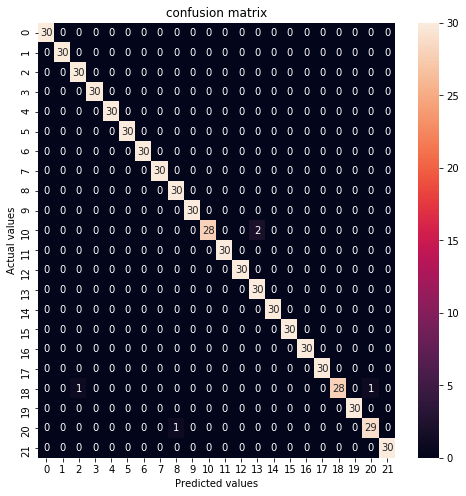

In [50]:
cm = confusion_matrix(df_y_test,predictions,list(model1.classes_))
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot = True)
plt.title("confusion matrix")
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [66]:
print(classification_report(df_y_test,predictions))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       0.97      1.00      0.98        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        30
        jute       0.97      1.00      0.98        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.93      0.97        30
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.94      1.00      0.97        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        30
      papaya       1.00    